In [ ]:
# IMPORTING DEPENDENCIES

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# IMPORT THE DATASET

from sklearn.datasets import load_breast_cancer

In [43]:
cancer = load_breast_cancer()

In [44]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [45]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


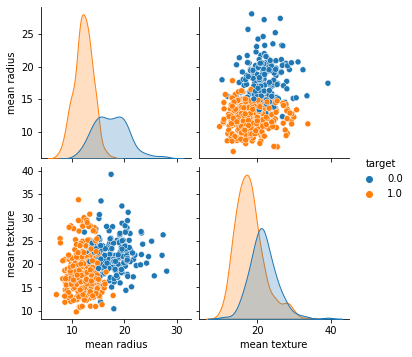

In [51]:
sns.pairplot(data=df_cancer, hue='target', vars=['mean radius', 'mean texture'])

<AxesSubplot:xlabel='target', ylabel='count'>

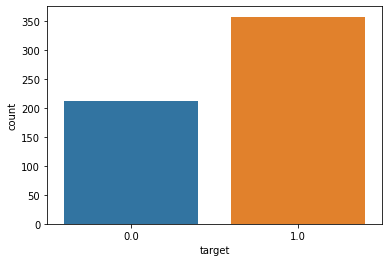

In [54]:
sns.countplot(df_cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

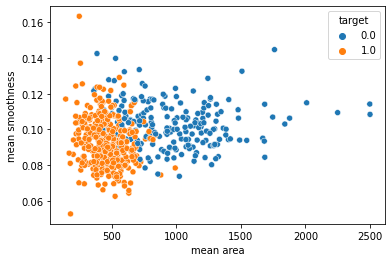

In [55]:
sns.scatterplot(x = 'mean area', y= 'mean smoothness', hue = 'target', data = df_cancer)

<AxesSubplot:>

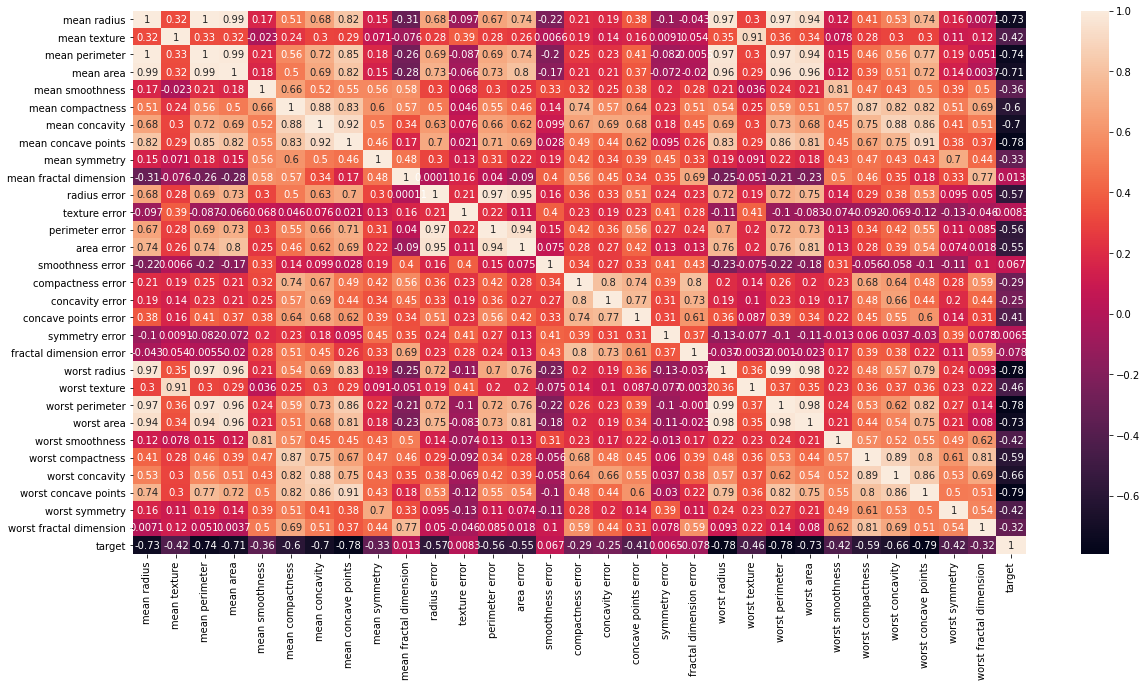

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(df_cancer.corr(), annot = True)

In [59]:
# MODEL TRAINING
x = df_cancer.drop(['target'], axis = 1)

In [61]:
y = df_cancer['target']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
%config Completer.use_jedi = False

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [72]:
SVC

sklearn.svm._classes.SVC

In [73]:
# MODEL EVALUATION
y_predict = svc_model.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

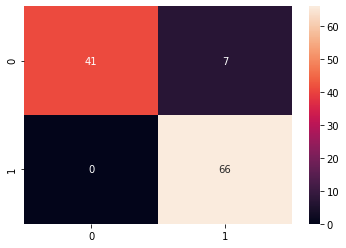

In [76]:
sns.heatmap(cm, annot = True)

In [77]:
# MODEL IMPROVEMENT
# ---> DATA NORMALIZATION (UNITY BASED NORMALIZATION)
# ---> SVM PARAMETER OPTIMIZATION

min_train = X_train.min()
range_train = (X_train - min_train).max()

In [78]:
x_train_scaled = (X_train - min_train)/range_train

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

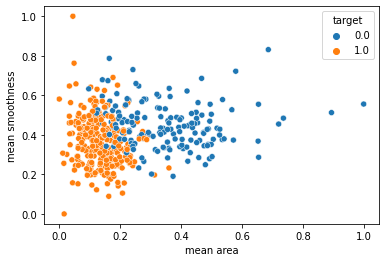

In [79]:
sns.scatterplot(x = x_train_scaled['mean area'], y = x_train_scaled['mean smoothness'], hue = y_train, data = x_train_scaled )

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

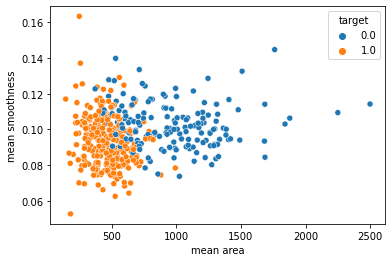

In [81]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train, data = X_train)

In [82]:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [83]:
y_predicted = svc_model.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, y_predicted)

<AxesSubplot:>

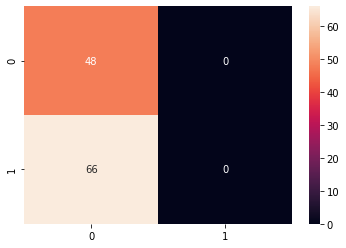

In [86]:
sns.heatmap(cm, annot=True)

In [87]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [88]:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [89]:
y_predict = svc_model.predict(X_test_scaled)

In [90]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

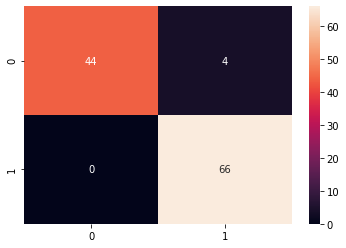

In [91]:
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [93]:
# SUPPORT VECTOR MACHINE PARAMETER OPTIMIZATION

param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

In [94]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [97]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [99]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [102]:
grid_predictions = grid.predict(X_test_scaled)

In [103]:
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

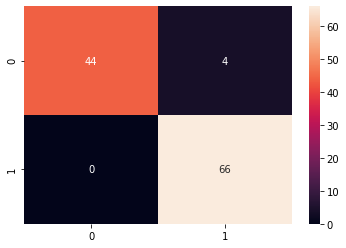

In [105]:
sns.heatmap(cm, annot=True)

In [106]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

